In [ ]:
! pip install beautifulsoup4 requests selenium

In [4]:
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import requests

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument("--disable-blink-features=AutomationControlled")

In [5]:
del options.arguments[0]

In [6]:
options.arguments

['--disable-blink-features=AutomationControlled']

In [71]:
url = 'https://mig.kz/'

In [72]:
page = requests.get(url)

In [73]:
soup = BeautifulSoup(page.text, "html.parser")

In [74]:
buys_all = [float(d.text) for d in soup.find_all('td', 'buy delta-neutral')]

In [75]:
sells_all =  [float(d.text) for d in soup.find_all('td', 'sell delta-neutral')]

In [77]:
currency = [d.text for d in soup.find_all('td', 'currency')]

In [78]:
final = list(zip(buys_all, sells_all, currency))

In [79]:
final

[(500.3, 503.3, 'USD'),
 (521.0, 525.0, 'EUR'),
 (5.45, 5.59, 'RUB'),
 (5.55, 6.15, 'KGS'),
 (625.0, 645.0, 'GBP'),
 (69.3, 73.5, 'CNY'),
 (45750.0, 48650.0, 'GOLD')]

In [3]:
driver = webdriver.Chrome(options=options)
driver.get("https://kurs.kz")
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
driver.close()

In [13]:
CURRENCIES = ('CNY', 'USD', 'EUR', 'GOLD')
driver = webdriver.Chrome()
driver.get("https://kurs.kz")
xpath = '//*[@id="kurs-table"]/main/table/thead/tr/th[3]/span[2]/select'
time.sleep(2)
select_element = driver.find_element(By.XPATH, xpath)  # Replace with actual value
select_element.click()

select = Select(select_element)

# Select an option by visible text
for i in range(len(CURRENCIES)):
    select.select_by_value(CURRENCIES[i])
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for d in soup.find_all(title = f'{CURRENCIES[i]} - покупка'):
        try:
            val = float(d.text)
            if val > 0:
                print(val)
        except ValueError:
            pass
    

driver.close()

<span class="svelte-kwr03n" title="CNY - покупка">69.5</span>
69.5
<span class="svelte-kwr03n" title="CNY - покупка">0</span>
<span class="svelte-kwr03n" title="CNY - покупка">0</span>
<span class="svelte-kwr03n" title="CNY - покупка">69</span>
69.0
<span class="svelte-kwr03n" title="CNY - покупка">69</span>
69.0
<span class="svelte-kwr03n" title="CNY - покупка">68.5</span>
68.5
<span class="svelte-kwr03n" title="CNY - покупка">68</span>
68.0
<span class="svelte-kwr03n" title="CNY - покупка">0</span>
<span class="svelte-kwr03n" title="CNY - покупка">69</span>
69.0
<span class="svelte-kwr03n" title="CNY - покупка">68</span>
68.0
<span class="svelte-kwr03n" title="CNY - покупка">68</span>
68.0
<span class="svelte-kwr03n" title="CNY - покупка">69.5</span>
69.5
<span class="svelte-kwr03n" title="CNY - покупка">68</span>
68.0
<span class="svelte-kwr03n" title="CNY - покупка">69.3</span>
69.3
<span class="svelte-kwr03n" title="CNY - покупка">69</span>
69.0
<span class="svelte-kwr03n" title="

In [12]:
driver.close()

In [119]:
def get_kurs_kz(title: str):
    all_currency = list()
    avg_sell, avg_buy = None, None
    for d in soup.find_all(title = title):
        try:
            val = float(d.text)
            if val > 0:
                all_currency.append(val)
        except ValueError:
            avg_sell, avg_buy = [float(v) for v in d.text.split(' — ')]
    return min(all_currency), max(all_currency), avg_sell, avg_buy

In [120]:
min_buy, max_buy, avg_sell, avg_buy = get_kurs_kz('')

In [121]:
min_buy, max_buy, avg_sell, avg_buy

(515.0, 522.0, 520.72, 524.85)

In [ ]:
https://data.nationalbank.kz/api/rss/latest-exchange-rates

In [ ]:
'USD - покупка'
'USD - продажа'
'EUR - покупка'
'EUR - продажа'
'RUB - покупка'
'RUB - продажа'

In [3]:
url = 'https://i.jzj9999.com/quoteh5/?ivk_sa=1025883i'

In [20]:
driver = webdriver.Chrome(options=options)
driver.get("https://i.jzj9999.com/quoteh5/?ivk_sa=1025883i")
time.sleep(5)
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
driver.close()

In [19]:
driver.close()

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="telephone=yes" name="format-detection"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, viewport-fit=cover, user-scalable=no" name="viewport"/>
<title>贵金属行情 | 融通金</title>
<link href="/web/favicon.ico" rel="icon"/>
<link href="/web/static/css/quoteh5.css" rel="stylesheet"/>
<script src="https://hm.baidu.com/hm.js?e7c57a1aebdb6b3ec08f5509336cb57a"></script><script crossorigin="" src="/web/static/js/quoteh5-f7b7bac0.js" type="module"></script>
<link crossorigin="" href="/web/static/js/vendor-957fb7c9.js" rel="modulepreload"/>
<link crossorigin="" href="/web/static/js/DINfont-aa175967.js" rel="modulepreload"/>
<link href="/web/static/css/style-f0b1c0ab.css" rel="stylesheet"/>
<script type="module">try{import.meta.url;import("_").catch(()=>1);}catch(e){}window.__vite_is_modern_browser=true;</script>
<script type="module">!function(){if(window.__vite_is_modern_browser)return;console.war
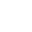
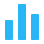
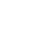
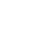
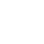

In [21]:
soup

In [33]:
t = [d.get_text(separator="\n", strip=True).split('\n') for d in soup.find_all('div', 'price-table-row')]

In [34]:
t

[['黄金9999', '680.65', '680.69', '684.00', '678.50'],
 ['黄金T+D', '680.59', '680.60', '681.60', '676.95'],
 ['黄 金', '679.70', '680.50', '680.69', '677.48'],
 ['白 银', '7.462', '7.512', '7.546', '7.496'],
 ['铂 金', '223.60', '225.10', '225.70', '223.70'],
 ['钯 金', '221.40', '222.90', '223.20', '221.60'],
 ['铑金', '1150.00', '--', '1150.00', '1030.00'],
 ['铱', '850.0', '--', '850.0', '850.0'],
 ['钌', '85.0', '--', '85.0', '85.0'],
 ['白银T+D', '8050', '8052', '8078', '7984'],
 ['铂金9995', '232.95', '233.54', '234.38', '233.00'],
 ['美黄金', '2919.20', '2919.40', '2926.40', '2913.10'],
 ['美铂金', '967.8', '968.1', '971.3', '964.6'],
 ['美钯金', '953.5', '955.0', '956.5', '949.5'],
 ['美白银', '32.920', '32.930', '33.150', '32.810'],
 ['美铑金', '5425.00', '5625.00', '5625.00', '5625.00'],
 ['伦敦金', '2912.75', '2913.10', '2918.19', '2906.82'],
 ['伦敦银', '32.458', '32.501', '32.645', '32.305'],
 ['伦敦铂', '964.10', '971.90', '966.05', '956.55'],
 ['伦敦钯', '946.75', '956.75', '950.39', '941.00'],
 ['美元', '7.2577', '7.